# Self-Driving Car Engineer Nanodegree
## Deep Learning
## Project: Build a Traffic Sign Recognition Classifier
In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with 'Implementation' in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with 'Optional' in the header.
In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a 'Question' header. Carefully read each question and provide thorough answers in the following text boxes that begin with 'Answer:'. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.
Note: Code and Markdown cells can be executed using the Shift + Enter keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# 1. Dataset Exploration

## Load Data

This part is modified to load the Traffic Sign Classifier data, input image: (32x32x3), output: 43-classes.
The imported data size is: Training Set:   34799 samples, Validation Set: 4410 samples, Test Set: 12630 samples.
So, As shown the validation set is 12.6 % of Training set

In [1]:
# Load pickled data
import pickle

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
  
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples\n".format(len(X_test)))
print("Percentage of Validation Set: {}%\n".format((len(X_validation)/len(X_train))* 100))
print("Sample of output classes in Training set before shuffle:")
print(y_train[0:1000])
print("\nSample of output classes in Validation set before shuffle:")
print(y_train[0:1000])


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples

Percentage of Validation Set: 12.672777953389467%

Sample of output classes in Training set before shuffle:
[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31

Since in my approach as shown in later sections, I will augment more data to both training set and validation set, So I prefer to put all the data in one container, apply all modifications then split.

In [3]:
# Put all data in one container or now

X_train = np.concatenate((X_train, X_validation), axis=0)
y_train = np.concatenate((y_train, y_validation), axis=0)
print("Current Training Set:   {} samples".format(len(X_train)))

Current Training Set:   39209 samples



Shuffle the  data.


In [4]:
from sklearn.utils import shuffle
# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

# Shuffle validation data
X_validation, y_validation = shuffle(X_validation, y_validation)

print("Sample of output classes in Training set after shuffle:")
print(y_train[0:1000])
print("\nSample of output classes in Validation set after shuffle:")
print(y_train[0:1000])

Sample of output classes in Training set after shuffle:
[13 37 14 12  2  3 23 40  1  2 23  9  4 38 13 18 39 38 17 17 22 13  1 38 13
  1 25 19  4  6  2 20 10  9  8 25 28  8 33  1 38  3  2 18  5  8 13 33 12 28
  3  2  4 25 25 11  2 23 13 32 11 18 19 23  7 15 35  8 12  5 33 17 31  8 10
  1 25 11 37  3  1 10  7 13 25 26 25  2 21 10 13 17 22 12  3 35 14 12  7 11
  7 14 13 23 26  5 31 10 26  1 13  1  3 11 38 15 10 11 11 10 16 29 31 13  6
 33 26  5 15  5 26 27 25 26 36  7  9 10 38 41 13 24 12 20  1  2 30 35 25 12
 15 18 10  5 42  5 12 12  8  8 13 38 13 37 34 13  3 23  5 23 35  1  5 41 17
 18 25 11  9  1  1  8 17 17  2  4 10  3 26 14 35 35 11  9 12 21  6  0 14 31
 25 38 10 28  6  1 11 10  9  9  9 10 14  5  3 29 36 40  3  1 20  2 13  7 35
 25 12 12  1  9 40 12  3 38  2 10  8 18 32 10  2 18 12 15  7 16 25 17 23 18
  7 10 33  6 22  7 33  1 35  1 23 42 31 24 13 39  3 31 25 17 35 38  7  1  9
  5  1 11  1 20 26  7  1 35 12  2 36 18 28  1 17 12 10  1 13 41 10 13 11 35
  9 38 11 19  3 15  7  7 38 18 1

## Visualize Data

View a sample from the dataset.



Datasets Mean values BEFORE Normalization are: 
Training set : 82.7764356557168 
Validation set: 83.55642737563775 
Testing set : 82.14846036120183 
Trainint set dimension is: (39209, 32, 32, 3)


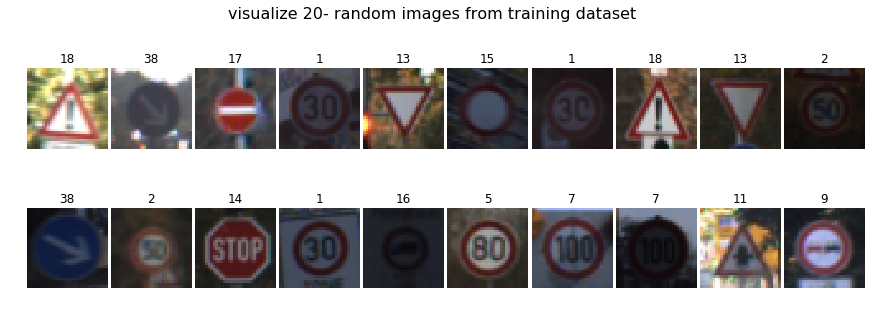

In [5]:

# Visualize 20- random images from training dataset

fig, axs = plt.subplots(2,10, figsize=(15, 5))
fig.subplots_adjust(hspace = .05, wspace=.05)
fig.suptitle("visualize 20- random images from training dataset", fontsize=16)
axs = axs.ravel()
for i in range(20):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

# printing the mean values for every dataset
X_train_mean= np.mean(X_train)
X_validation_mean= np.mean(X_validation)
X_test_mean= np.mean(X_test)
print("Datasets Mean values BEFORE Normalization are: ")
print("Training set : {} ".format(X_train_mean))
print("Validation set: {} ".format(X_validation_mean))
print("Testing set : {} ".format(X_test_mean))
print("Trainint set dimension is: {}".format(X_train.shape))


### Visualize the label frequency in the Original training dataset.

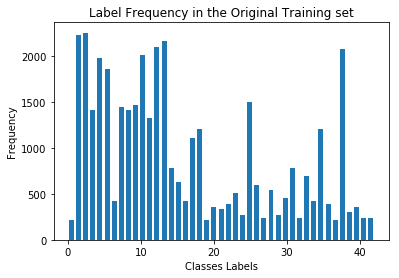

In [6]:

hist, bins = np.histogram(y_train, bins=43)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency in the Original Training set")
plt.xlabel('Classes Labels')
plt.ylabel('Frequency')
plt.show()

# 2. DataSet Preparation

## Preprocess Data

Here, I Pre-processed the Data Set using normalization & grayscale.
Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data and can be used in this project.

Grayscale Image Shape: (32, 32, 1)


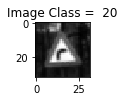

In [7]:

# Convert to grayscale, 
X_train = np.sum(X_train/3, axis=3, keepdims=True)
X_validation = np.sum(X_validation/3, axis=3, keepdims=True)
X_test = np.sum(X_test/3, axis=3, keepdims=True)




# visualize 1- Random image after grayscale conversion from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
#plt.figure(figsize=(3,3))
plt.title("Image Class =  {}".format(y_train[index]))
plt.imshow(image, cmap="gray")
#print(y_train[index])

# printing the data image dimension now after converting to grayscale
print("Grayscale Image Shape: {}".format(X_train[0].shape))






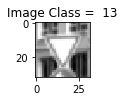

In [8]:
# Normalize the data (pixel - 128)/ 128

X_train = (X_train - 128)/128
X_validation = (X_validation - 128)/128
X_test = (X_test - 128)/128

# visualize 1- Random image after Normalization from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.title("Image Class =  {}".format(y_train[index]))
plt.imshow(image, cmap="gray")


## Another method for Normalizing grayscale
I also tried this method for notmalizaiton, and it gave me Mean value around (0.35) for Training set, but in my overall implementation I used the 1st method applied above.

Implement the Min-Max scaling function ($X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}$) with the parameters:
$X_{\min }=0$
$X_{\max }=255$
$a=0.1$
$b=0.9$

a = 0.1
b = 0.9
grayscale_min = 0
grayscale_max = 255

X_train = a + ( ( (X_train - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
X_validation = a + ( ( (X_validation - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
X_test = a + ( ( (X_test - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

# visualize 1- Random image after Normalization from training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

Calculatng Mean Values of Training, validation and testing datasets after Noramlization ( Should be around 0)

In [9]:


# printing the mean values for every dataset
X_train_N_mean= np.mean(X_train)
X_validation_N_mean= np.mean(X_validation)
X_test_N_mean= np.mean(X_test)
print("Datasets Mean values AFTER Normalization are: \n")
print("Training set : {} ".format(X_train_N_mean))
print("Validation set: {} ".format(X_validation_N_mean))
print("Testing set : {} ".format(X_test_N_mean))
print("Trainint set dimension is: {}".format(X_train.shape))




Datasets Mean values AFTER Normalization are: 

Training set : -0.3533090964397123 
Validation set: -0.3472154111278302 
Testing set : -0.3582151534281105 
Trainint set dimension is: (39209, 32, 32, 1)


## Augmenting Training set

Augmenting the training set might help improve model performance. Common data augmentation techniques include rotation, translation, zoom, flips, and/or color perturbation. These techniques can be used individually or combined.


In this section, I used the input data processing techniques as suggested by the [Lecun paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), now I have a jittered dataset by adding 3
transformed versions of randomly selected sets of  the original training set, which are :

1) Random Image Rotation between -15 and 15 degrees

2) Random Affine Transformation

3) Random Brighness 

### 1) Random Image Rotation

An Image before Rotation: 
23
An Image after Rotation: 
23
Check matching the sign name after Rotation and concatenation: 
1

Image Shape: (32, 32, 1)

Training Set:   78418 samples
Validation Set: 4410 samples
Test Set:       12630 samples


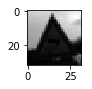

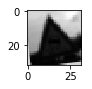

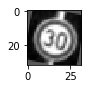

In [10]:
import cv2



def Rotating(input): 
    output = []
    for i in range (len(input)):
        # Choose a random angle between -15 and 15 to do the rotation
        angle = np.random.randint(-15, 15)
        img_center = tuple(np.array(input[i].shape)[:2]/2)
        M = cv2.getRotationMatrix2D(img_center,angle,1.0)
        img = cv2.warpAffine(input[i], M, input[i].shape[:2],flags=cv2.INTER_LINEAR)
        img = img[:,:,np.newaxis]
        output.append(img)
    
    
    return output

# Augmenting both training and validation datasets with Randomly rotated images, expecting a doupled sized datasets
input = X_train[0:len(X_train)]
input_y = y_train[0:len(y_train)]
X_train_rotated = Rotating(input)
#valid = X_validation[0:3000]
#valid_y = y_validation[0:3000]
#X_validation_rotated= Rotating(valid)



# display an Image before and after rotation


print ("An Image before Rotation: ")
image = X_train[10].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[10])


print ("An Image after Rotation: ")
image = X_train_rotated[10].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[10])
    

    
X_train = np.concatenate((X_train, X_train_rotated), axis=0)
y_train = np.concatenate((y_train, input_y), axis=0)

#X_validation = np.concatenate((X_validation, X_validation_rotated), axis=0)
#y_validation = np.concatenate((y_validation, valid_y), axis=0)


print ("Check matching the sign name after Rotation and concatenation: ")
image = X_train[40000].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[40000])

# Shuffle new training data
X_train, y_train = shuffle(X_train, y_train)

# Shuffle new validation data
#X_validation, y_validation = shuffle(X_validation, y_validation)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

### 2) Random Affine Transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image

In [ ]:
import cv2
def Transforming(input): 
    output = []
    
    for i in range (len(input)):
        rows,cols,ch = input[i].shape
       # pts1 = np.float32([[2,2],[30,2],[2,300]])
       # pts2 = np.float32([[25,25],[30,2],[25,31]])
         # transform limits
        px = np.random.randint(-2,2)
        pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px]])
        pts2 = np.float32([[px,px],[rows,px],[px,cols]])
        M = cv2.getAffineTransform(pts1,pts2)
        img = cv2.warpAffine(input[i],M,(cols,rows))
        img = img[:,:,np.newaxis]
        output.append(img)
    
    
    return output

# Augmenting both training and validation datasets with Randomly rotated images, expecting a doupled sized datasets
input = X_train[20000:60000]
input_y = y_train[20000:60000]
X_train_transformed = Transforming(input)
#valid = X_validation[0:3000]
#valid_y = y_validation[0:3000]
#X_validation_rotated= Rotating(valid)



# display an Image before and after rotation

#plt.subplot(121),plt.imshow(X_train[21000].squeeze()), plt.title('Image before Transformation')
#plt.subplot(122),plt.imshow(X_train_transformed[21000].squeeze()),plt.title('Image after Transformation')
#plt.show()


print ("An Image before Transformation: ")
image = X_train[25000].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[25000])


print ("An Image after Transfomation: ")
image = X_train_transformed[25000].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[25000])
    
    
X_train = np.concatenate((X_train, X_train_transformed), axis=0)
y_train = np.concatenate((y_train, input_y), axis=0)

#X_validation = np.concatenate((X_validation, X_validation_rotated), axis=0)
#y_validation = np.concatenate((y_validation, valid_y), axis=0)


print ("Check matching the sign name after Rotation and concatenation: ")
image = X_train[40000].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[40000])

# Shuffle new training data
X_train, y_train = shuffle(X_train, y_train)

# Shuffle new validation data
#X_validation, y_validation = shuffle(X_validation, y_validation)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

### 3) Random Brighness

 x-train-bright  78418
y-train-bright 78418
Image dimension before Brighness application:  (32, 32, 1)
X-train-Brighness 78418
An Image before any Brightening: 
31
An Image after random Brightening: 
31
x_train befor brighness augmentation 78418
y_train before brighness augmentation 78418
x_train_final 156836
y_train_final 156836

Image Shape: (32, 32, 1)

Training Set:   156836 samples
Validation Set: 4410 samples
Test Set:       12630 samples


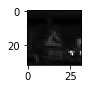

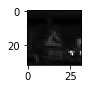

In [11]:
def Brighness(input): 
    output = []
    print("Image dimension before Brighness application: ", input[0].shape)
    for i in range (len(input)):
        img= input[i]
        shifted = img + 1.0   # shift to (0,2) range
        img_max_value = max(shifted.flatten())
        max_coef = 2.0/img_max_value
        min_coef = max_coef - 0.1
        coef = np.random.uniform(min_coef, max_coef)
        dst = shifted * coef - 1.0
        output.append(dst)
    
    return output
# take 35000 image from training set to do brighness over it then suffle it
input = X_train[0:len(X_train)]
input_y = y_train[0:len(y_train)]
print(" x-train-bright ", len(input))
print("y-train-bright", len(input_y))

X_train_Brighness= Brighness(input)
print("X-train-Brighness", len(X_train_Brighness))

# display an Image before and after applying Random brightness


print ("An Image before any Brightening: ")
image = X_train[50].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[50])


print ("An Image after random Brightening: ")
image = X_train_Brighness[50].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[50])

#valid = X_validation[0:3500]
#print(" x-valid-bright ", len(valid))

#valid_y = y_validation[0:3500]
#print(" y-valid-bright ", len(valid_y))

#X_validation_Brighness= Brighness(valid)
#print("X_validation_Brighness", len(X_validation_Brighness))

print("x_train befor brighness augmentation", len(X_train))
print("y_train before brighness augmentation", len(y_train))


X_train = np.concatenate((X_train, X_train_Brighness), axis=0)
y_train = np.concatenate((y_train, input_y), axis=0)
print("x_train_final", len(X_train))
print("y_train_final", len(y_train))


#X_validation = np.concatenate((X_validation, X_validation_Brighness), axis=0)
#y_validation = np.concatenate((y_validation, valid_y), axis=0)
#print("x_validation_final", len(X_validation))
#print("y_validation_final", len(y_validation))





# Shuffle new training data
X_train, y_train = shuffle(X_train, y_train)

# Shuffle new validation data
#X_validation, y_validation = shuffle(X_validation, y_validation)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


## Splitng Validation dataset from Training dataset
As always suggested, it is prefered to have a validation set of size between 20%-30% of Training set, so I will use 20% of the Training set to the Validation set

In [12]:
## Split validation  from training 

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)


print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

New X_train size: 125468
X_validation size: 31368


## Setup TensorFlow, and set the hyperparmeters sizes.

All hyperparameters (EPOCHS, BATCH_SIZE, dropout and learning_rate) are empirically chosen. Overall, I performed 40- expermints to get the final results, and the following numbers are the best combinations I got among all.

In [13]:
import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 150
dropout = 0.5
rate = 0.0005

# 3. Design and Test a Model Architecture

## Original LeNet-5
During my first set of experminting, I used the orignal LeNet-5 architecture as describe in Lab2, I just modified the layers inputs and outputs based on have input of (32X32X10) and output (43-classes) and added a dropout before the last layer (Layer 5). here is the immplementation of the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

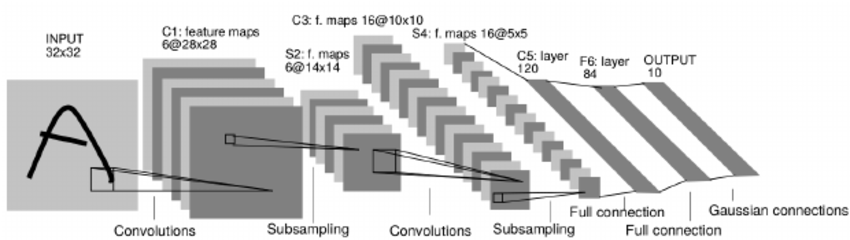

Source: Yan LeCun



### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. C is 1 in this case, since we are working on a grayscale Images.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Using Relu activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Using Relu activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Using Relu activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Using Relu activation function.

**Dropout.**  Using Dropout for Regularization.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer (Logits).

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # ---> Using Dropout for Regularization 
    fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
print('End')

End


## Modified LeNet5
Using Suggested Architecture in [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). A 2-stage ConvNet architecture. The input is processed in a feedforward manner through two stage of convolutions and subsampling, and finally classified with a linear classifier. The output of the 1st stage is also fed directly to the classifier as higher-resolution features.

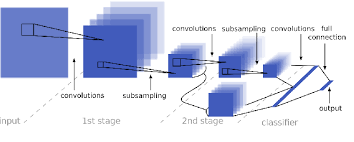

Here I implemented a modified LeNet-5 architecture as suggested in [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). Here, the modifications are:

1) Using 4- layer architecture instead of 5 ( 3- Convolutional layers and 1- fully connected) as shown in the fig above.

2) Flatten and concatenating the output from Layer 2 and Layer 3 then feed to a fully Connected layer (Layer 4) after applying dropout.



### Input
The LeNet_modified architecture accepts a 32x32xC image as input, where C is the number of color channels. C is 1 in this case, since we are working on a grayscale Images.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Using Relu activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Using Relu activation function.

**Pooling.** The output shape should be 5x5x16.

**Layer 3: Convolutional.** The output shape should be 1x1x400.

**Activation.** Using Relu activation function.


**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, here flatten Layer 2 output (400), and layer3 output (400)

**Concatenate.** Concatenate both flattened outputs of layer 2 and layer 3, so we get input of layer 4 (size = 800)

**Dropout.**  Using Dropout for Regularization.

**Layer 4: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return Logits

In [15]:
def LeNet_modified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="conv1_W")
    conv1_b = tf.Variable(tf.zeros(6), name="conv1_b")
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # print("layer 1 shape:",conv1.get_shape())

     # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #conv1 = tf.nn.dropout(conv1, 0.9)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="conv2_W")
    conv2_b = tf.Variable(tf.zeros(16), name="conv2_b")
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #conv2 = tf.nn.dropout(conv2, 0.8)
    
    # Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="conv3_W")
    conv3_b = tf.Variable(tf.zeros(400), name="conv3_b")
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
                     
    # Activation.
    conv3 = tf.nn.relu(conv3)
    
    #conv3 = tf.nn.dropout(conv3, 0.7)


    # Flatten layer2 output, input = 5x5x16. Output = 400.
    layer2_flat = flatten(conv2)
    print("layer2_flat shape:",layer2_flat.get_shape())
    
    # Flatten layer3 output, Input = 1x1x400. Output = 400.
    layer3_flat = flatten(conv3)
    print("layer3_flat shape:",layer3_flat.get_shape())
    
    # Concatenate layer2_flat and layer3_flat. so we get  800 inputs to layer 4.
    conv3 = tf.concat_v2([layer2_flat, layer3_flat], 1)
    
    
    # Dropout
    #conv3 = tf.nn.dropout(conv3, dropout)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="fc4_W")
    fc4_b = tf.Variable(tf.zeros(43), name="fc4_b")    
    logits = tf.add(tf.matmul(conv3, fc4_W), fc4_b)
    
    
    
    return logits

print('End')

End


## Features and Labels
Train LeNet to classify [Traffic- Signs data](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
print('End')

End


## Training Pipeline
Create a training pipeline that uses the model to classify data.

You do not need to modify this section.

In [17]:


#logits = LeNet(x)
logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer2_flat shape: (?, 400)
layer3_flat shape: (?, 400)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('End')

End


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
         
        validation_accuracy = evaluate(X_validation, y_validation)
        
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.923

EPOCH 2 ...
Validation Accuracy = 0.968

EPOCH 3 ...
Validation Accuracy = 0.984

EPOCH 4 ...
Validation Accuracy = 0.989

EPOCH 5 ...
Validation Accuracy = 0.994

EPOCH 6 ...
Validation Accuracy = 0.995

EPOCH 7 ...
Validation Accuracy = 0.993

EPOCH 8 ...
Validation Accuracy = 0.995

EPOCH 9 ...
Validation Accuracy = 0.997

EPOCH 10 ...
Validation Accuracy = 0.995

EPOCH 11 ...
Validation Accuracy = 0.995

EPOCH 12 ...
Validation Accuracy = 0.997

EPOCH 13 ...
Validation Accuracy = 0.997

EPOCH 14 ...
Validation Accuracy = 0.996

EPOCH 15 ...
Validation Accuracy = 0.997

EPOCH 16 ...
Validation Accuracy = 0.997

EPOCH 17 ...
Validation Accuracy = 0.996

EPOCH 18 ...
Validation Accuracy = 0.996

EPOCH 19 ...
Validation Accuracy = 0.998

EPOCH 20 ...
Validation Accuracy = 0.999

EPOCH 21 ...
Validation Accuracy = 0.995

EPOCH 22 ...
Validation Accuracy = 0.997

EPOCH 23 ...
Validation Accuracy = 0.998

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.



In [20]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_validation, y_validation)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Train Accuracy = 1.000
Valid Accuracy = 0.999
Test Accuracy = 0.941


## Final Results
Now, after using the approach described in the above sections, here are my final results:

**Train Accuracy (100%)**

**Validation Accuracy (99.9%)**

**Test Accuracy (94.1%)**

# 4. Test a Model on New Images
To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.
You may find signnames.csv useful as it contains mappings from the class id (integer) to the actual sign name.

## Load and Output the Images

In [21]:
### Import libraries here, in case it is needed to run this part without re-training the Network.
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import glob
import cv2  #bringing in OpenCV libraries
from PIL import Image
import random


# List the Images, my sample has 8-Images
os.listdir("test_dataset")



['10.jpg',
 '8.jpg',
 '2.png',
 '3.png',
 '13.jpg',
 '14.jpg',
 '4.png',
 '7.jpg',
 '6.png',
 '1.png',
 '5.png',
 '9.jpg',
 '12.jpg',
 '11.jpg']

dimensions test_dataset Images are: 
 
()
Dataset Mean value BEFORE Normalization is: 131.71056547619048 


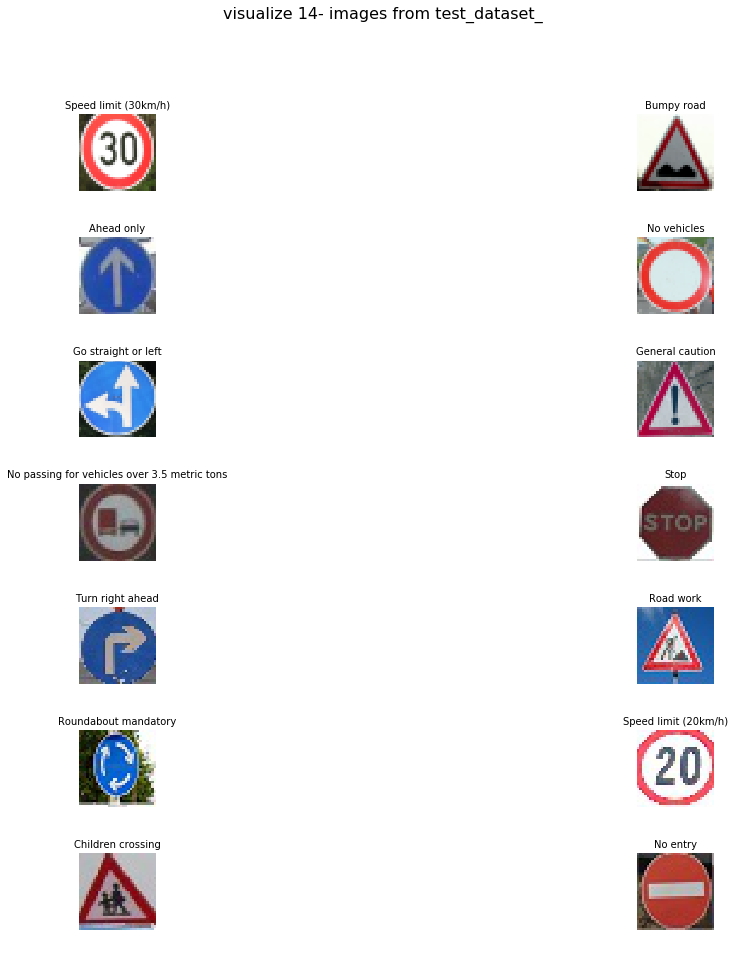

In [22]:
#Reading and display downloaded German Sample images after resizing
images1 = sorted(glob.glob('./test_dataset/*.png'))
images2 = sorted(glob.glob('./test_dataset/*.jpg'))
images = np.concatenate((images1, images2), axis=0)


labels = np.array([1, 22, 35, 15, 37, 18, 10, 14, 33, 25, 40, 0, 28, 17 ])
Y = labels
signnames = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
print("dimensions test_dataset Images are: \n ")
print( images[1].shape)

i=0
sample_images = []
labels_names = {}
for image in images:
    img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
   # print( "Img"+str(i+1)+" = ",img.shape)
    sample_images.append(img)
    labels_names[i] = signnames[labels[i]][1].decode('ascii')
    #print("label_names"+str(i+1)+"= ", labels_names[i])
    #print("\n\n")
    i = i + 1
    
    

fig, axs = plt.subplots(7,2, figsize=(15, 15))
fig.subplots_adjust(hspace = .6, wspace=1)
fig.suptitle("visualize 14- images from test_dataset_", fontsize= 16)
axs = axs.ravel()

for i in range(14):
    image = sample_images[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(labels_names[i], fontsize = 10)

# printing the mean value of the dataset before Normalization
sample_images_mean = np.mean(sample_images)
print("Dataset Mean value BEFORE Normalization is: {} ".format(sample_images_mean))

Grayscale size of sample_image  =  (32, 32, 1)
Dataset Mean value AFTER Normalization is: 0.0289887927827381 
Test Inputs dimension is (14, 32, 32, 1)
Test Outputs dimension is (14,)


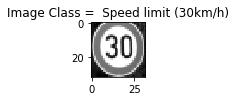

In [23]:
# Converting to grayscale then Normalize
sample_images = np.array(sample_images)
sample_images_gray = np.sum(sample_images/3, axis=3, keepdims=True)
sample_images_normalized = (sample_images_gray - 128)/128 
X = sample_images_normalized


# Display Images after turning to grayscale and normalzation
print("Grayscale size of sample_image  = ",sample_images_gray[5].shape)


# printing the mean value of the dataset after Normalization
sample_images_normalized_mean= np.mean(sample_images_normalized)
print("Dataset Mean value AFTER Normalization is: {} ".format(sample_images_normalized_mean))

# Display 1- Random image after Normalization from training dataset
index = random.randint(0, len(sample_images_normalized)-1)
image = sample_images_normalized[index].squeeze()
plt.figure(figsize=(1,1))
plt.title("Image Class =  {}".format(labels_names[index]))
plt.imshow(image, cmap="gray")

print( "Test Inputs dimension is", X.shape)
print( "Test Outputs dimension is", Y.shape)


## Predict the Sign Type for Each Image


In [24]:
# Compare between the Expected prediction and the Actual Predection per image

import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    predictions = sess.run(logits, feed_dict={x: X})

error = 0
for prediction,i in zip(predictions, range(len(predictions))):
    print("Image{}   expected class is = {} VS predicted class is = {}".format(i, Y[i], np.argmax(prediction)))
    if np.argmax(prediction) != Y[i]:
        error += 1
print("Error:", error)

Image0   expected class is = 1 VS predicted class is = 1
Image1   expected class is = 22 VS predicted class is = 29
Image2   expected class is = 35 VS predicted class is = 35
Image3   expected class is = 15 VS predicted class is = 12
Image4   expected class is = 37 VS predicted class is = 37
Image5   expected class is = 18 VS predicted class is = 18
Image6   expected class is = 10 VS predicted class is = 10
Image7   expected class is = 14 VS predicted class is = 14
Image8   expected class is = 33 VS predicted class is = 33
Image9   expected class is = 25 VS predicted class is = 25
Image10   expected class is = 40 VS predicted class is = 40
Image11   expected class is = 0 VS predicted class is = 31
Image12   expected class is = 28 VS predicted class is = 34
Image13   expected class is = 17 VS predicted class is = 17
Error: 4


## Calculating Precision performance parameter 

As shown from above data, the model gives 6 error predicted classes and 8 correctly predicted classes , which gives us the following Precision  value:

** Precision = 8/12 = 0.66 = 66.66% **

## Mispredicted Classes inspection

The following classes are the 6- mispredicted in my Model:

Class 1 --> Speed limit (30km/h)

Class 15 --> No vehicles

Class 14 --> Stop

Class 33 --> Turn right ahead

Class 40 --> Roundabout mandatory

Class 28 --> Children crossing

So, Let's visualize the Current Traning set and Validation set classes labels frequencies:


 Current Trainin Set size =  125468


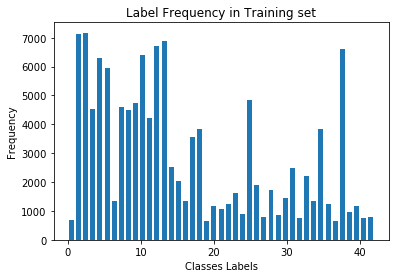

In [25]:
# Visualize Current Traning set labels frequencies diagram
print(" Current Trainin Set size = ", len(y_train))
hist, bins = np.histogram(y_train, bins=43)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency in Training set")
plt.xlabel('Classes Labels')
plt.ylabel('Frequency')
plt.show()


 Current Trainin Set size =  31368


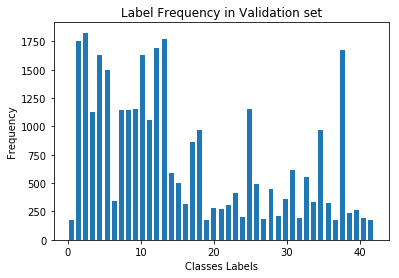

In [26]:
# Visualize Current Traning set labels frequencies diagram
print(" Current Trainin Set size = ", len(y_validation))
hist, bins = np.histogram(y_validation, bins=43)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Label Frequency in Validation set")
plt.xlabel('Classes Labels')
plt.ylabel('Frequency')
plt.show()


### Now it is clear that the classes that are mis-predicted are not trained well, so now I will Augment more training and validation data for those classes to make sure the model is trained well enough to predict those classes.

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf
with tf.Session() as sess:
   # sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X, Y)
    print("Random Images Test Accuracy = {:.3f}".format(test_accuracy))

## Augmenting more data
Here, I will go to the previous data augmentation section and Augment more data, then train the model and test again

### Model Predicition Re-evaluation on the Random test images after Augmentintg more data

Now error = 4 out of 12.

Image0   expected class is = 1 VS predicted class is = 1

Image1   expected class is = 22 VS predicted class is = 29

Image2   expected class is = 35 VS predicted class is = 35

Image3   expected class is = 15 VS predicted class is = 12

Image4   expected class is = 37 VS predicted class is = 37

Image5   expected class is = 18 VS predicted class is = 18

Image6   expected class is = 10 VS predicted class is = 10

Image7   expected class is = 14 VS predicted class is = 14

Image8   expected class is = 33 VS predicted class is = 33

Image9   expected class is = 25 VS predicted class is = 25

Image10   expected class is = 40 VS predicted class is = 40

Image11   expected class is = 0 VS predicted class is = 31

Image12   expected class is = 28 VS predicted class is = 34

Image13   expected class is = 17 VS predicted class is = 17

Error: 4

** Which enhanced the precision from 66.66% to 83.33% **





## Analyze Performance

In [31]:
### Calculate the testing accuracy for these 14 new images. 


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    my_accuracy = evaluate(X, Y)
    print("Random Image testing Accuracy = {:.3f}\n".format(my_accuracy))
        

Random Image testing Accuracy = 0.714



## Suggested Solution for higher perfromance (TODO)
Go over the web, and get more images for the classes with lower samples and augment with training set, then train the model and evaluate again.

## Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). tf.nn.top_k could prove helpful here.

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. tf.nn.top_k is used to choose the three classes with the highest probability:

 (5, 6) array
 
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,

         0.12789202],
         
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
       
         0.15899337],
         
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
       
         0.23892179],
         
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
       
         0.16505091],
         
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
       
         0.09155967]])
         
Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:

TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],

       [ 0.28086119,  0.27569815,  0.18063401],
       
       [ 0.26076848,  0.23892179,  0.23664738],
       
       [ 0.29198961,  0.26234032,  0.16505091],
       
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       
       [0, 1, 4],
       
       [0, 5, 1],
       
       [1, 3, 5],
       
       [1, 4, 3]], dtype=int32))
       
Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices.


In [2]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    Softmax = tf.nn.softmax(logits)
    New_logits = sess.run(Softmax, feed_dict={x: X})
    Top5 = sess.run(tf.nn.top_k(tf.constant(New_logits), k=5))
    # Top 5- classes predicted per Testing Image
    Top5Classes = Top5[1]
print(Top5[0])
print(Top5Classes)

NameError: name 'saver' is not defined

## Visualization of the top 5-Softmax per Image

In [36]:
# Display Top 5- Softmax per Class for every Image in the Random testing images
for i in range(14):
    image = sample_images[i]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(str(i), fontsize = 10)
    for j in Top5Classes:
        print ( "Top 5 softmax predictions of image" + str(i) +" is " )
        for k in j:
            print(labels_names[k])
        print("\n")    
            
        
        

Top 5 softmax predictions of image0 is 
Bumpy road
Ahead only


KeyError: 40